In [2]:
# Name: Odysseas Papakyriakou

import pandas as pd
import os
import csv

from data_processing import *
from transformations import *
from visualizations import *

from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

# Introduction
The topic of this project is the relationship between countries' performance in the Olympics and their economic affluency. There has been an increasing interest in the relationship between countries' performance in the Olympics and their economical situation [(Takongmo & Yao, 2017)](https://economie.esg.uqam.ca/wp-content/uploads/sites/54/2017/09/Mao-Takongmo-Charle-O-Mai2017-1.pdf), so I believe this project will contribute to the current body of knowledge on the topic. Moreover, this subject is of special interest to me, since I have always been interested in sports, practicing gymnastics, and coming from a country (Greece) that does not do well economically and is not very supportive of professional athletes (in terms of grants, infrastracture, facilites, compensation, etc.). 

### Main research question:
* Is there a relationship between performance in the Olympics and economic affluency?

### How the variables are measured:
* **Performance in the Olympics** : Total number of medals obtained by country
* **Economic affluency** : Gross Domestic Product (GDP) per capita.
    * The values are in US dollars and adjusted for inflation. This means that the values are comparable with each other, regardless of the year, or the currency of the country.

### Hypothesis:
* It is hypothesized that there will be a positive relationship between performance in the Olympics and GDP, meaning that richer countries will tend to do better in the Olympics. Note that this is a merely descriptive question, so no causal connection can be inferred when only investigating relationships.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# Refining the research question
* To provide a well-rounded answer to the research question, two subquestions are formulated:

## Subquestion 1:
* **(a)** Is there a relationship between countries' medalists and their GDP per capita?
* **(b)** Is this relationship different if the number of medalists is adjusted for each country's population?
    * *Justification*: It is conceivable that countries with a large number of citizens have more athletes that win medals. What would the number of medals be, if all countries had the same number of citizens? Adjusting for population size allows to compare each countries' medalists withouth the influence of population. This is done by using the following formula: **Adjusted medalists = (Total medalists * 10^7) / population size**, which gives the number of medalists for every 10 million citizens for every country.
* **(c)** Can there be meaningful groups (clusters) of countries? 
    * (e.g. countries that are very rich but perform poorly, or countries that are poor but perform great etc.)

## Subquestion 2:
* **(a)** What is the relationship between the number of medalists and GDP per capita for any two specific countries?

* *Justification*: Visualizing a relationship might reveal a general trend in the data, but it cannot allow to compare countries and get more focused information. It is possible that not all countries follow the general trend, so by comparing specific countries with each other, one can get a more complete picture of the relationship.

* **(b)** Is this relationship different if the number of medalists is adusted for each country's population?

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# General description of datasets:

### For this project I used 4 different datasets from 2 different sources:
* From [kaggle](https://www.kaggle.com/) I downloaded the **Olympics** and the **noc_regions** datasets.
    * The **Olympics** dataset contains hundreds of thousands of entries, representing each athlete that took part in the Olympics since 1896. The columns refer to several of the athletes' characteristics (for example, age, NOC, medal, year, sport, height, etc.). The column 'NOC' contains the abbreviation of the athlete's country, so I used the noc_regions dataset to match this abbreviation with the full name of the country.
    * The **noc_regions** dataset contains the abbreviations and the full name of the countries, along with some (unimportant for this project) notes.
* From [gapminder](https://www.gapminder.org/data/) I downloaded the **population_total** and the **gdppercapita_us_inflation_adjusted** datasets.
    * Each entry in the original **populations** dataset represents a year since 1800 and the columns refer to the countries. The values correspond to the population of each country for a given year. This dataset was combined with an edited version of the olympics dataset (grouped by country) to calculate the number of medalists adjusted for population size.
    * The original **gdp** dataset is of the same stracture as the populations datasets, with the difference that the year starts from 1960. The values represent the gdp per capita of each country for a given year. This dataset was also combined with the edited version of the olympics datased (grouped by country).
        * For the purposes of the project I needed **one value** for each countries' GDP and population. As a result, I used the average for both measures, so the average GDP of each country over the years, and the average population over the years. This allowed to perform all necessary computations and visualize the data properly, without distorting them much.
    
### All datasets were downloaded as .csv files and read into the program afterwards.
### The pipeline of the project can be divided into 4 phases:
1. Basic processing
2. Transformations
3. Saving the transformed datasets
4. Visualizations

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1. Basic processing of the data
###### In this phase I read the data
* Firstly, I read the Olympics and the noc_regions datasets into the program with the built-in pandas function. 
* I also add the full name of the countries in the Olympics dataset based on the noc_regions dataset (*merge_dfs* function), after having made sure all the abbreviations in the two datasets match (*match_noc_regions* function). 
* The population and gdp datasets are read with the function *read_extra_files*, so that they are reshaped appropriately for further transformations.

In [3]:
# Read files
olympics = pd.read_csv("Initial Data/olympics.csv")
noc = pd.read_csv("Initial Data/noc_regions.csv")

gdp = read_extra_files("Initial Data/gdppercapita_us_inflation_adjusted.csv")
pop = read_extra_files("Initial Data/population_total.csv")

In [4]:
# Create a new df 'merged' with the Olympics dataset that now contains the full name of the countries
olympics, noc = match_noc_regions(olympics, noc)
merged = merge_dfs(olympics, noc)

# 2. Transformations
###### In this phase I perform all necessary steps so that the data are in their final version for the first visualization.
* Firstly, with the *clean_data* function I remove some unnecessary columns and I replace missing values in some (irrelevant for the project) columns, so that no important data are lost.
* With the *dummies_for_medals* function I add dummy variables for the medals, so that it is easier to compute the total number of medals. This means that I create separate columns for each category in the *medal* column (Gold, Silver, Bronze, none). When the entry has a categorical value, then the corresponding column gets the value of 1, and the rest get the value of 0. For more on dummy variables you can look [here](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)).
* With the *match_countries* function I make sure that the countries are written in the same way across the datasets, and I include only the countries that are in all datasets (otherwise I could not plot them).
* With the *final_transformation* function I create a final df with all necessary information from all datasets, while excluding irrelevant information. This dataframe is used for the first visualization.

In [5]:
# Clean the data
data = clean_data(merged)

In [6]:
# Add dummies for the medals column
data = dummies_for_medals(data)

In [7]:
# Match the countries in the gdp and pop dfs, so they are the same with the Olympics df
gdp, countries_in_gdp_and_ol = match_countries(gdp, data)
pop, countries_in_pop_and_ol = match_countries(pop, data)

# A list with the common countries across the 3 dataframes
common_countries = sorted(list(countries_in_gdp_and_ol.intersection(countries_in_pop_and_ol)))

In [8]:
# Create the final dataframe, on which the first visualization is based
final = final_transformation(data, gdp, pop)

In [9]:
# This is how the final dataframe looks like
pd.options.display.float_format = '{:.2f}'.format
final.head(2)

,country,Gold,Silver,Bronze,N of medalists (raw),mean_gdp,mean_pop,N of medalists (per 10m)
0,Afghanistan,0.00,0.00,2.00,2.00,466.60,11971818.18,1.67
1,Albania,0.00,0.00,0.00,0.00,2638.11,1832743.80,0.00


# 3. Saving the transformed datasets
###### In this phase I create a copy of the transformed datasets (as is specified in the assignment instructions). This is also useful later, when I create the visualizations, because I can simply import the files without having to perform all previous steps.
* In addition to the datasets, I also export *common_countries*, which is a file with all the common countries across datasets. This is used in the second visualization, so the user can select which two countries to compare. 

In [10]:
# Export the data
path = os.getcwd()     # get the current location
data.to_csv(os.path.join(path + '/Transformed Data', 'data.csv'), index=False, header=True)     # export the olympics df
gdp.to_csv(os.path.join(path + '/Transformed Data', 'gdp.csv'), index=True, header=True)     # export the gdp df
pop.to_csv(os.path.join(path + '/Transformed Data', 'pop.csv'), index=True, header=True)     # export the population df
with open('Transformed Data/countries.csv', "w") as output:     # export the common countries
    writer = csv.writer(output, lineterminator='\n')
    [writer.writerow([val]) for val in common_countries]
final.to_csv(os.path.join(path + '/Transformed Data', 'final.csv'), index=False, header=True)     # export the final dataframe

# 4. Visualizations
###### In this phase I create the visualizations with which I aim to answer the research questions.

## Visualization to answer subquestion 1: 
* Relationship between number of medalists and GDP
    * The user can select which metric to visualize for the medalists:
        1. Raw total (N of medalists (raw))
        2. Adjusted for population (N of medalists (per 10m))
    * The user can also hover over the data points to see the name of the country and the relevant values

In [11]:
relationship = visualize_relationship
show(relationship)

### Interpretation of the visualization:
* **(a)** It seems that there is **a negligible positive relationship** between countries' economic affluency and their performance in the Olympics:
    * The correlation coefficient is only 0.22 when the metric is the raw total of medalists, and 0.36 when the number of medalists is adjusted for population size. In both cases, this implies a negligible to weak positive correlation.
* **(b)** Interestingly, the relationship seems to get slightly stronger when the number of medalists is adjusted for population size. Even more interesting is the fact that the performance of specific countries seems to change significantly when the metric for the medalists is changed (their position on the y axis changes as a result of adjusting for population size).
    * For example, the USA is the country with the greatest number of medalists (raw total), so it is the highest data point on the y axis. However, when the metric is changed (adjusted for population size), the USA moves to slightly above the bottom of the y axis, which means that considering its population size, it does not have that many medalists. On the contrary, the country that now has the most medalists is the Bahamas, a small country that seems to produce a lot of medalists, given its population.
* **(c)** Regarding the groups of countries, I implemented **k-means clustering** from the **sklearn library** to visualize the different groups. K-means clustering produces the different clusters by placing several centers in different positions of the board and calculating each data point's distance from that center. When the distance is minimum for a lot of data points the data points belong to this center (cluster). The function applies as many clusters as given by the user. As a result of this process, the position of the center can vary between different implementations (k-means is not deterministic), that is why by default, the function is run 300 times, so the result is the average of this, which results in the same clusters across different implementations. I implemented k-means by following the instructions on the sklearn library. For more information you can look [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
    * The visualization shows that there are 3 different groups of countries. The first group contains the greatest number of countries, which are the ones with the smaller GDP. Most of these countries have no to very few medalists, but there are a few that stand out for their relatively large number of medalists, like *Hungary, Jamaica, Romania, Bulgaria, Cuba, Uruguay, and Serbia*. The second group contains fewer and richer countries, which generaly have more medalists. Finally, the third group is made up of 2 countries that are very rich, but perform very poorly on the Olympics. Looking at their names (Monaco and Liechtenstein, this is not very surprasing since they are very small countries, so they probably have few athletes that perform in the Olympics).

### Evaluating the performance of kmeans clustering:
* One issue when performing k-means clustering is how to decide on how many clusters to use. There are several methods to asses how representative the number of clusters is, of which I used the average silhouette and the elbow method.
    * The **average silhouette score** takes values from -1 to 1 for a specific number of clusters. The closer to 1 the value is, the more representative the number of clusters. With the *kmeans_silhouette* function I visualize the performance for different numbers of clusters. The code is largely based on the documentation of the method from the sklearn library and can be viewed [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
    * The **elbow method** shows the Within-Cluster Sum of Squares (WCSS), which represents the variance of the data points from their center. Naturally, the fewer the clusters the greater the variance will be, so WCSS gets lower as the number of clusters increases. This method suggests that the optimal number of clusters is the one after which the WCSS begins to level off. For this vidualization is used the inertia_ method of the sklearn library to calculate the WCSS when doing k-means. More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and [here](https://en.wikipedia.org/wiki/K-means_clustering#Description). 

For n_clusters = 2 The average silhouette_score is : 0.7870137161986913
For n_clusters = 3 The average silhouette_score is : 0.7930479844151622
For n_clusters = 4 The average silhouette_score is : 0.79922715650338
For n_clusters = 5 The average silhouette_score is : 0.7146265558340723
For n_clusters = 6 The average silhouette_score is : 0.6738374049148992


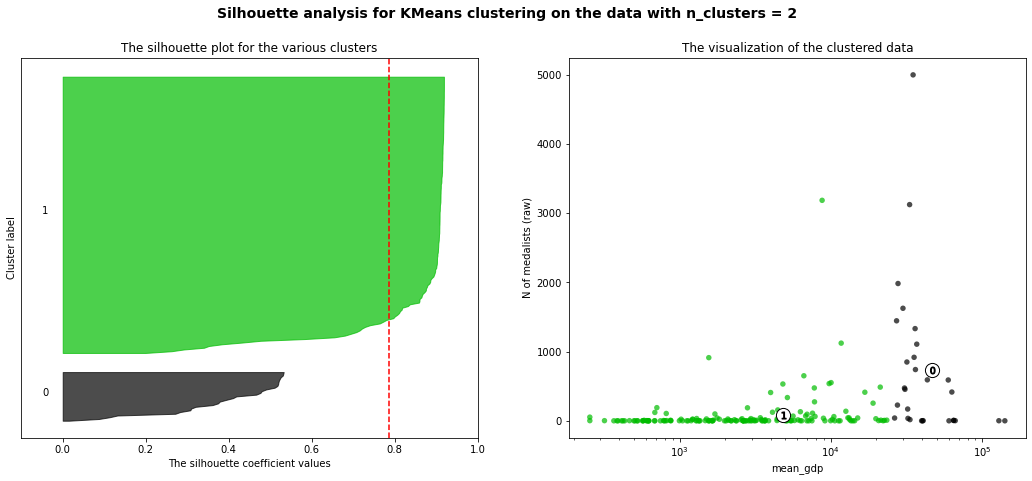

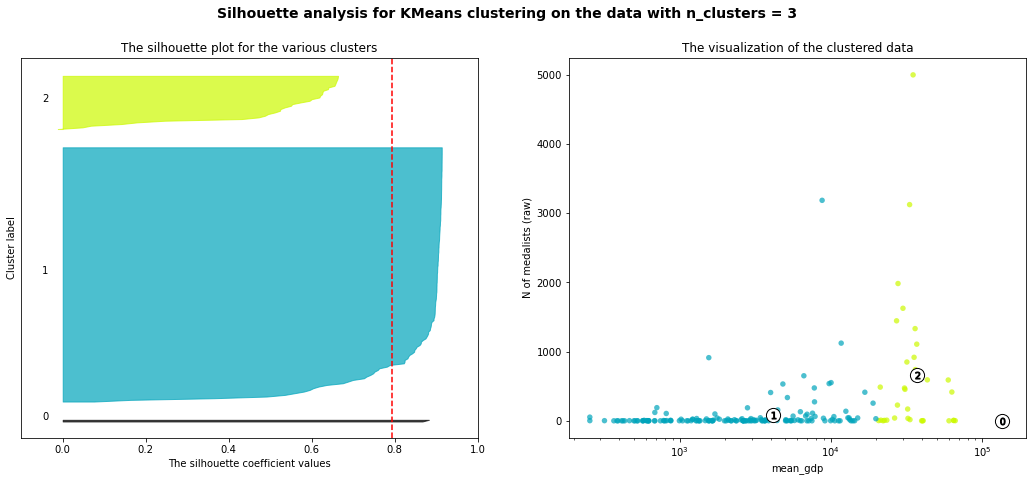

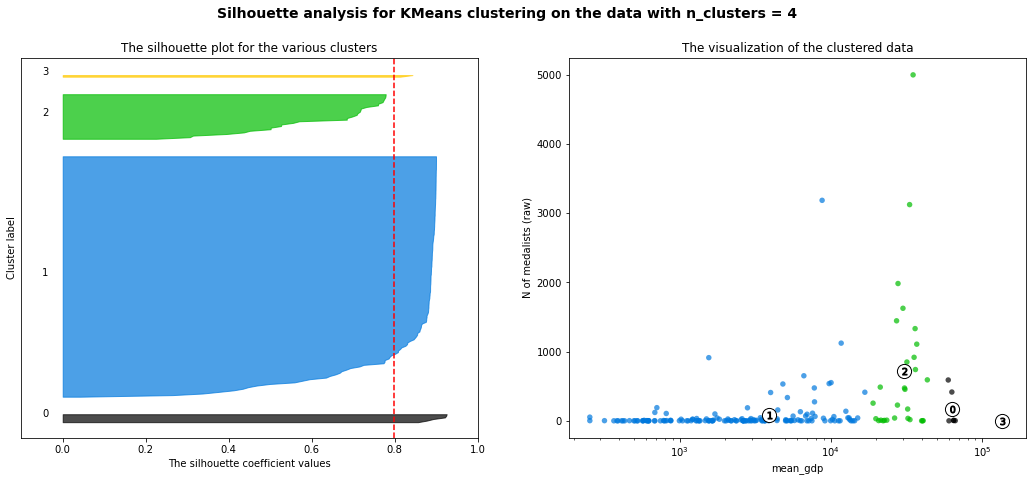

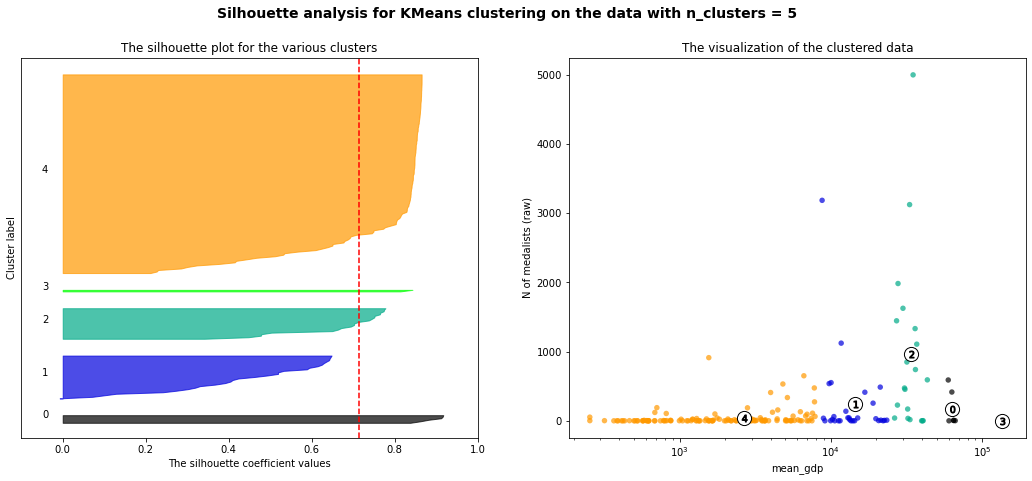

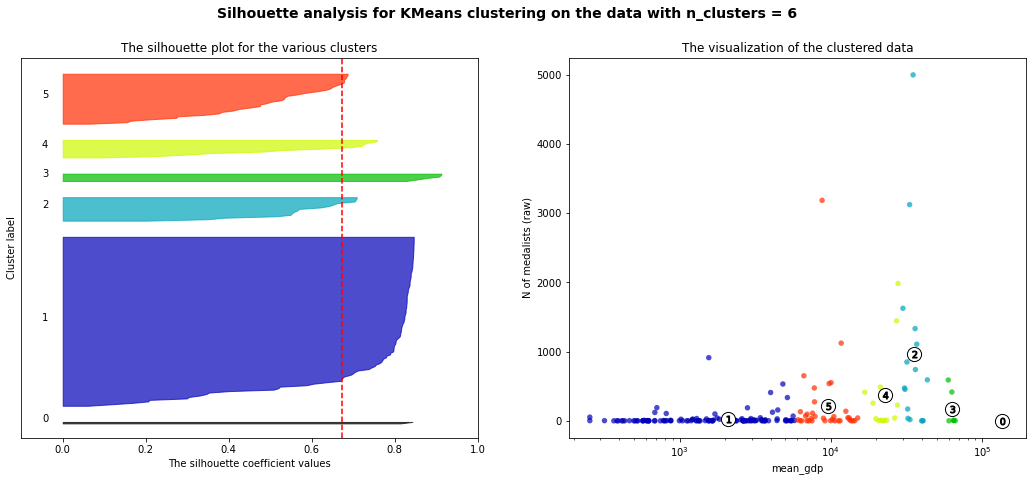

In [12]:
kmeans_silhouette('mean_gdp', 'N of medalists (raw)')

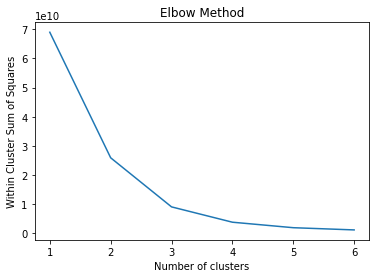

In [13]:
kmeans_elbow_method('mean_gdp', 'N of medalists (raw)')

### Interpretation of the evaluation:
* Even though the average-silouette score suggests that the best number of clusters is 4 (since it is closer to 1), **I opted for 3 clusters**. This is because the extra group that was added did not seem to lead to useful information about the groups. Moreover, its performance was only 0.006 points better than for the performance of 3 clusters.
* I believe that such decisions must always be informed by the relevant statistics, but they should always be evaluated for their meaningfulness and not be applied blindly. In this case, I believe it is justified to use 3 clusters instead of 4, especially since the Elbow method also suggests that using 3 clusters is a good decision (the line levels off after 3 clusters).

## Visualization to answer subquestion 2:
* Relationship between any two particular countries
    * The user can select which two countries to compare
    * The user can also hover over the plots and see the particular values for medalists, year, GDP, etc.

In [14]:
p = visualize_performances
show(p)

### Interpretation of the visualization:
* **(a)** The exact relationship differs depending on which countries are visualized. 
    * The left plot shows how the two countries compare on the number of medalists over the years:
        * The continuous lines represent the raw total number of medalists
        * The dashed lines represent the number of medalists adjusted for population size
    * The right plot shows how the two countries compare on GDP per capita over the years
* **(b)** For many countries, it seems that the relationship differs between the two different metrics for medalists.
    * For example the USA has a lot more medalists in total (raw) than Jamaica, but if we take into account these countries' population, Jamaica far exceeds the USA in their number of medalistts, especially after 1980, even though it is a much poorer country, as is depicted on the left plot.
    * Moreover, by comparing the two line charts, we can see the relationship of performance in the Olympics and GDP. For some countries, like the USA, as the line showing GDP rises, so does the line showing the total number of medalists. Other countries follow different patterns. The line showing GDP might rise, while the line showing the total number of medalists might remain stable (Norway), or even decline (Austria).

## Conclusion:
### This great variability in the dataset shows why the relationship between performance in the Olympics and economic affluency is so small and also highlights that even though there might be a (negligible) general trend in the data, a lot of individual data points (countries) do not follow that trend.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------